In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Asus/Downloads/data.csv")
df.shape

(214969, 51)

In [3]:
df.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8_Protection of elderly people', 'H8_Flag', 'M1_Wildcard',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'Stringenc

In [4]:
numerical = [col for col in df.columns if df[col].dtypes != 'O']

In [5]:
dfus = df[df["CountryName"] == 'United States']
dfusw = dfus[dfus["RegionName"]== 'Louisiana']
dfusw.drop(dfusw.tail(4).index,inplace=True)
dfusw

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
186031,United States,USA,Louisiana,US_LA,STATE_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
186032,United States,USA,Louisiana,US_LA,STATE_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
186033,United States,USA,Louisiana,US_LA,STATE_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
186034,United States,USA,Louisiana,US_LA,STATE_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
186035,United States,USA,Louisiana,US_LA,STATE_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186711,United States,USA,Louisiana,US_LA,STATE_TOTAL,20211111,1.0,0.0,2.0,0.0,...,45.83,45.83,55.95,55.95,51.04,51.04,54.76,54.76,25.0,25.0
186712,United States,USA,Louisiana,US_LA,STATE_TOTAL,20211112,1.0,0.0,2.0,0.0,...,45.83,45.83,55.95,55.95,51.04,51.04,54.76,54.76,25.0,25.0
186713,United States,USA,Louisiana,US_LA,STATE_TOTAL,20211113,1.0,0.0,2.0,0.0,...,45.83,45.83,55.95,55.95,51.04,51.04,54.76,54.76,25.0,25.0
186714,United States,USA,Louisiana,US_LA,STATE_TOTAL,20211114,1.0,0.0,2.0,0.0,...,45.83,45.83,55.95,55.95,51.04,51.04,54.76,54.76,25.0,25.0


In [6]:
dfusw["Date"] = pd.to_datetime(dfusw["Date"],format='%Y%m%d')

In [7]:
dfusw[dfusw["GovernmentResponseIndex"].isnull()]["Date"]

186608   2021-07-31
186609   2021-08-01
186610   2021-08-02
186697   2021-10-28
Name: Date, dtype: datetime64[ns]

In [8]:
dfusw[dfusw["StringencyIndex"].isnull()]["Date"]

186697   2021-10-28
Name: Date, dtype: datetime64[ns]

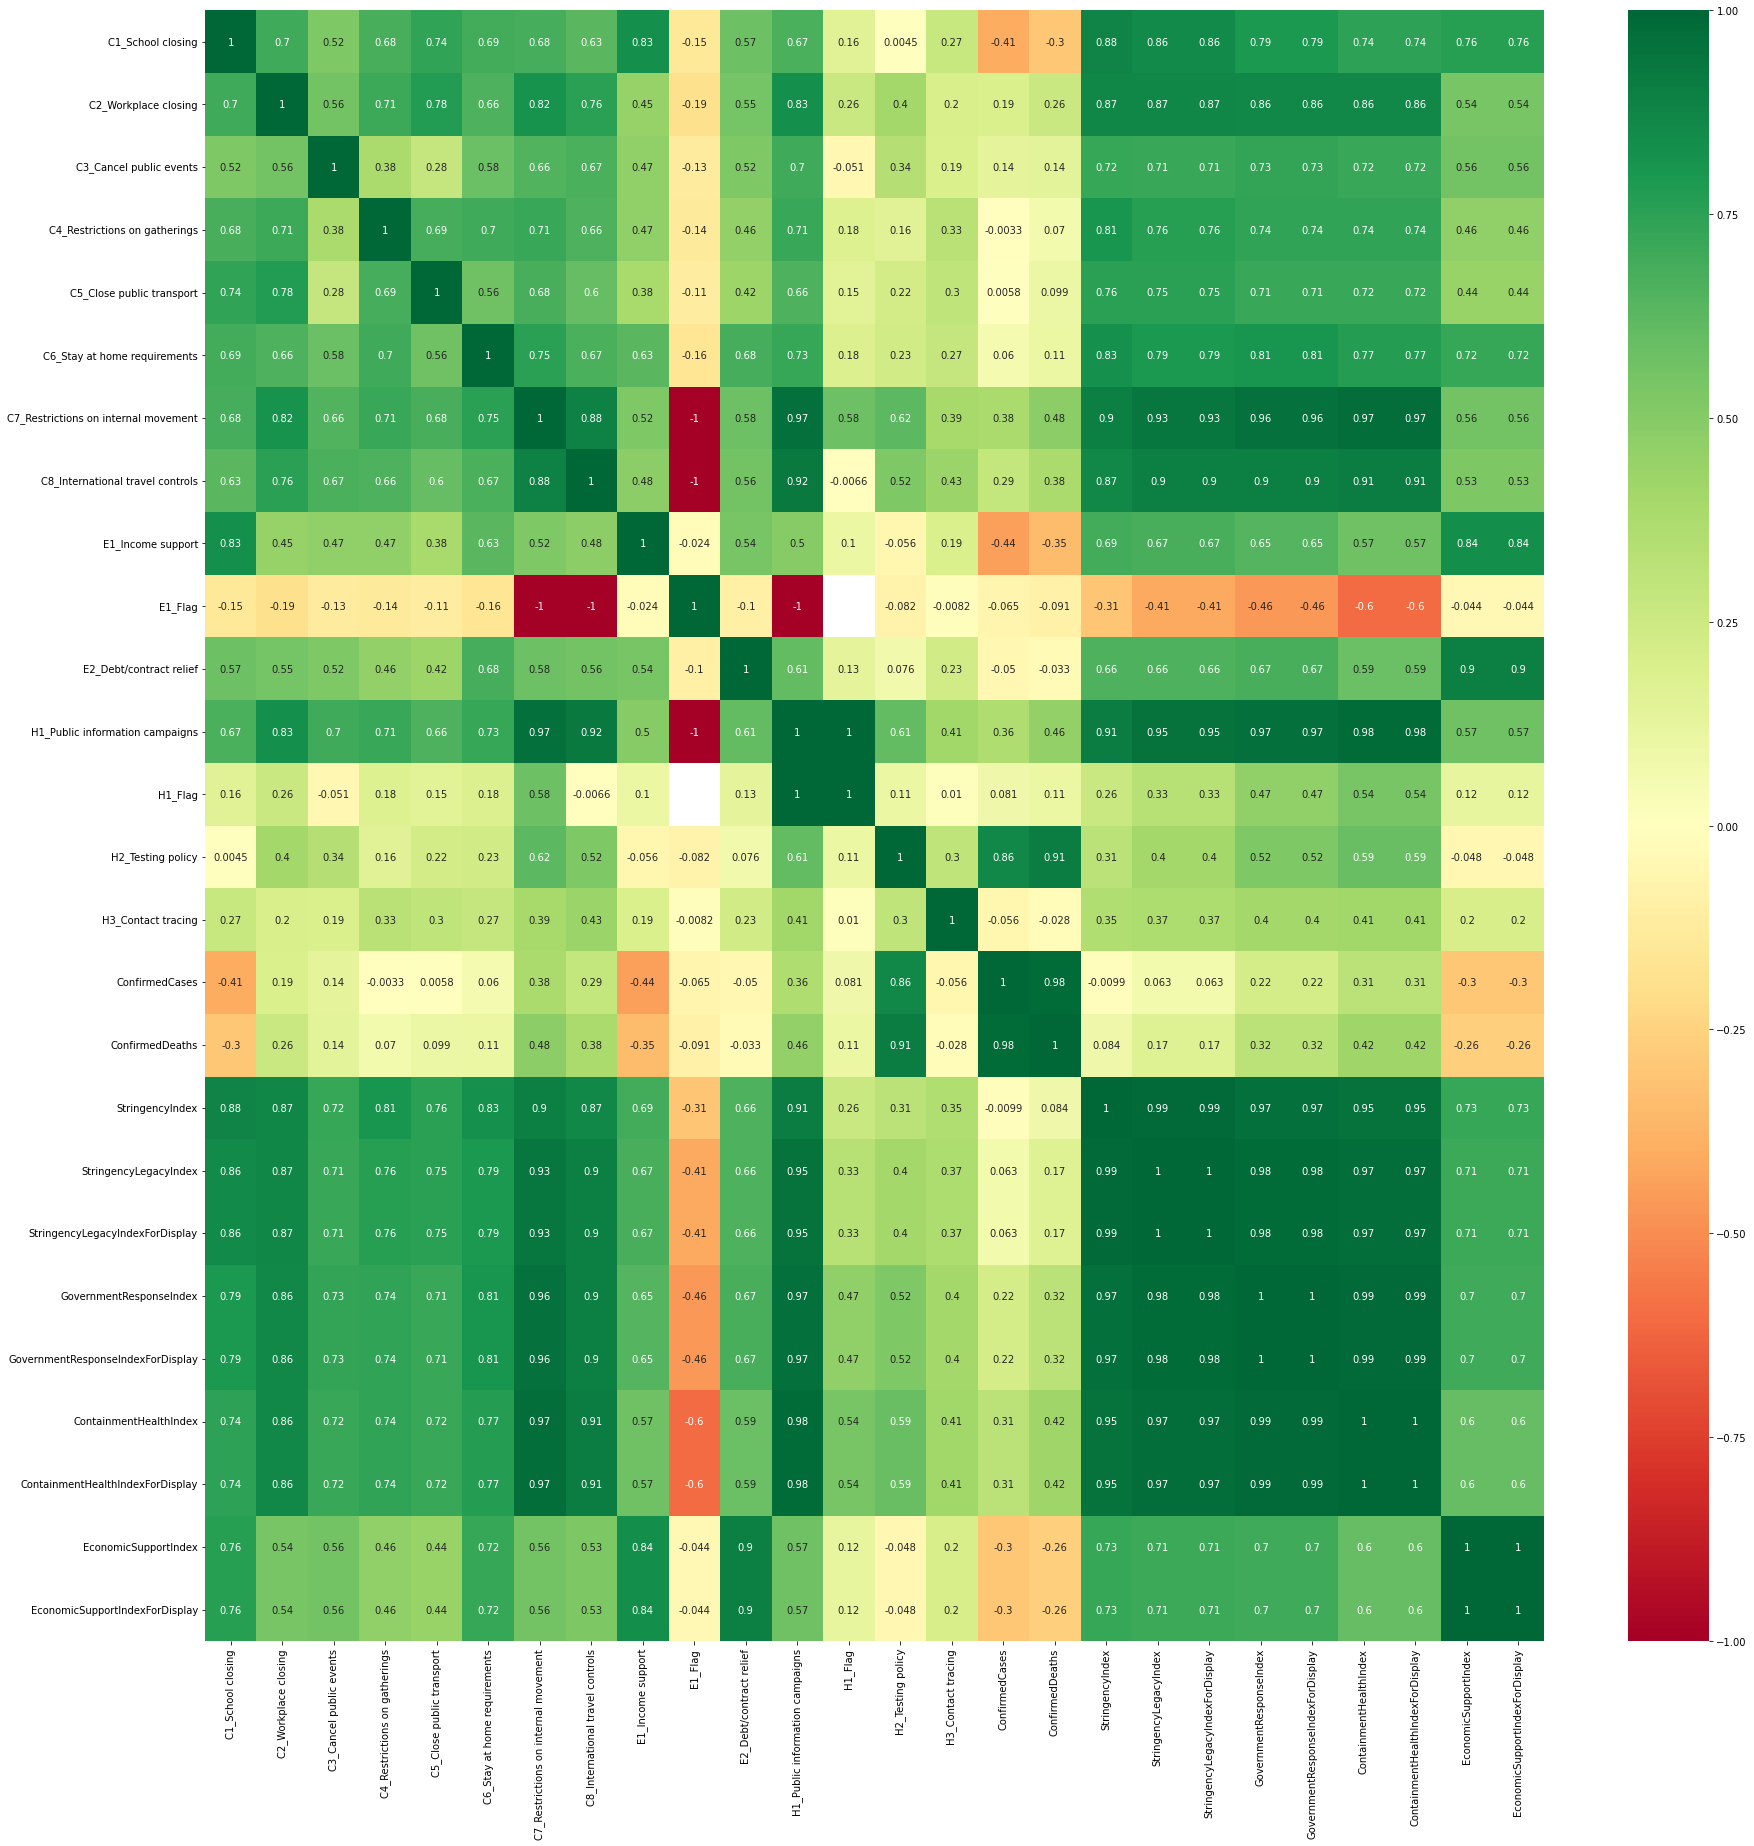

In [9]:
import seaborn as sns
X = dfusw.iloc[:,0:-1]  #independent columns
y = dfusw.iloc[:,-1]   #target column i.e price range
#get correlations of each features in dataset
corrmat = dfusw.iloc[:,[6,8,10,12,14,16,18,20,21,22,23, 26,27,28,29, 39,40,41,42,43,44,45,46,47,48,49,50]].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(dfusw[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
dfusw[numerical].isnull().sum()

C1_School closing                          1
C1_Flag                                   73
C2_Workplace closing                       1
C2_Flag                                   72
C3_Cancel public events                    1
C3_Flag                                   70
C4_Restrictions on gatherings              1
C4_Flag                                   83
C5_Close public transport                  1
C5_Flag                                  145
C6_Stay at home requirements               1
C6_Flag                                   83
C7_Restrictions on internal movement       1
C7_Flag                                   76
C8_International travel controls           1
E1_Income support                          0
E1_Flag                                  157
E2_Debt/contract relief                    0
E3_Fiscal measures                       685
E4_International support                 685
H1_Public information campaigns            0
H1_Flag                                   69
H2_Testing

In [11]:
dfuswn = dfusw[dfusw['GovernmentResponseIndex'].notnull()]

In [12]:
X = dfuswn[['StringencyIndex']]
y = dfuswn[['GovernmentResponseIndex']]

In [13]:
def polynomial_plot(feature, label,a,b):
    # Create 1D array. We can use 'squeeze' function to reduce the 2D array to 1D array
    x_coordinates = feature
    y_coordinates = np.squeeze(label)
    a = a
    b = np.squeeze(b)
    # Contruct first degree polynomial function
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    # Contruct second degree polynomial function
    quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 10))
    # Generate evenly spaced values
    values = np.linspace(x_coordinates.min(), x_coordinates.max(),1000)
    print(values.shape)
    plt.scatter(a,b, color='purple')
    plt.scatter(x_coordinates,y_coordinates, color='blue')
    plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Linear Function')
    plt.plot(values, quadratic_func(values), color='red', label='Quadratic Function')
    plt.xlabel('StringencyIndex')
    plt.ylabel('GovernmentResponseIndex')
    plt.rcParams["figure.figsize"] = (10,15) # Custom figure size in inches
    plt.legend()
    plt.title("Linear Vs Quadratic Function")
    plt.show()
    print ("GovernmentResponseIndex 01/08/2021 QUADRATIC ")
    print(quadratic_func(48.61))
    print ("GovernmentResponseIndex 01/08/2021 LINEAR ")
    print(linear_func(48.61))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape 

((544, 1), (137, 1))

(1000,)


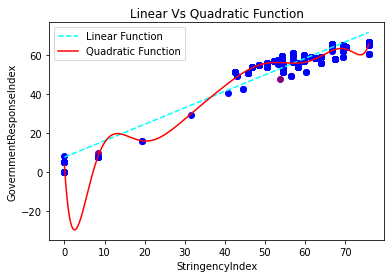

GovernmentResponseIndex 01/08/2021 QUADRATIC 
54.886806596174615
GovernmentResponseIndex 01/08/2021 LINEAR 
48.662782584701354


In [15]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
polynomial_plot(X_train[:,0], y_train[:,0],X_test[:,0], y_test[:,0])

In [16]:
dfusw[dfusw["Date"] == '2021-08-1'][["Date","StringencyIndex","GovernmentResponseIndex"]]

,Date,StringencyIndex,GovernmentResponseIndex
186609,2021-08-01,48.61,NaN


In [17]:
dfusw[dfusw["Date"] == '2021-07-20'][["Date","StringencyIndex","GovernmentResponseIndex"]]

,Date,StringencyIndex,GovernmentResponseIndex
186597,2021-07-20,46.76,53.91


In [18]:
dfusw[dfusw["Date"] == '2021-08-6'][["Date","StringencyIndex","GovernmentResponseIndex"]]

,Date,StringencyIndex,GovernmentResponseIndex
186614,2021-08-06,48.61,54.95


In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(dfuswn[['C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport','C6_Stay at home requirements','H1_Public information campaigns','C7_Restrictions on internal movement','C8_International travel controls']])
y = np.asanyarray(dfuswn[['StringencyIndex']])

regr.fit(x,y)
print('Coefficients: ', regr.coef_)

Coefficients:  [[6.80136586 3.54945809 4.77445004 2.63603872 1.58051378 4.07883654
  3.87034256 2.45153221 2.69712556]]


In [20]:
y_= regr.predict(dfuswn[['C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport','C6_Stay at home requirements','H1_Public information campaigns','C7_Restrictions on internal movement','C8_International travel controls']])

In [21]:
dfusw.iloc[523,[6,8,10,12,14,16,18,20,26,41]]

C1_School closing                         2.0
C2_Workplace closing                      2.0
C3_Cancel public events                   1.0
C4_Restrictions on gatherings             2.0
C5_Close public transport                 1.0
C6_Stay at home requirements              1.0
C7_Restrictions on internal movement      1.0
C8_International travel controls          3.0
H1_Public information campaigns           2.0
StringencyIndex                         52.31
Name: 186554, dtype: object

In [22]:
y_= regr.predict(dfuswn[['C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport','C6_Stay at home requirements','H1_Public information campaigns','C7_Restrictions on internal movement','C8_International travel controls']])
x = np.asanyarray(dfuswn[['C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport','C6_Stay at home requirements','H1_Public information campaigns','C7_Restrictions on internal movement','C8_International travel controls']])
y = np.asanyarray(dfuswn[['StringencyIndex']])

print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y)) #Return the coefficient of determination of the prediction.
y.shape

Residual sum of squares: 1.07
Variance score: 1.00


(681, 1)

In [23]:
y_[566]

array([47.53192296])

In [24]:
y[566]

array([46.76])

Text(0.5, 1.0, "Valeur réelle de l'etiquette vs Valeur prédite par le modèle")

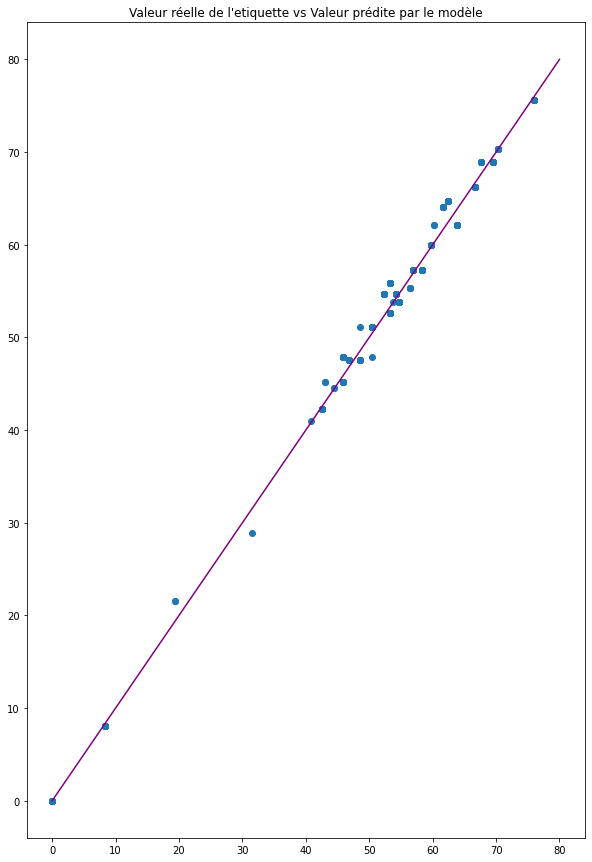

In [25]:
plt.scatter(y,y_)
x = np.linspace(0, 80, 1000)
plt.rcParams["figure.figsize"] = (14,14)
plt.plot(x, x,color='purple');
plt.title("Valeur réelle de l'etiquette vs Valeur prédite par le modèle")

Text(0.5, 1.0, 'Histogram of Residuals')

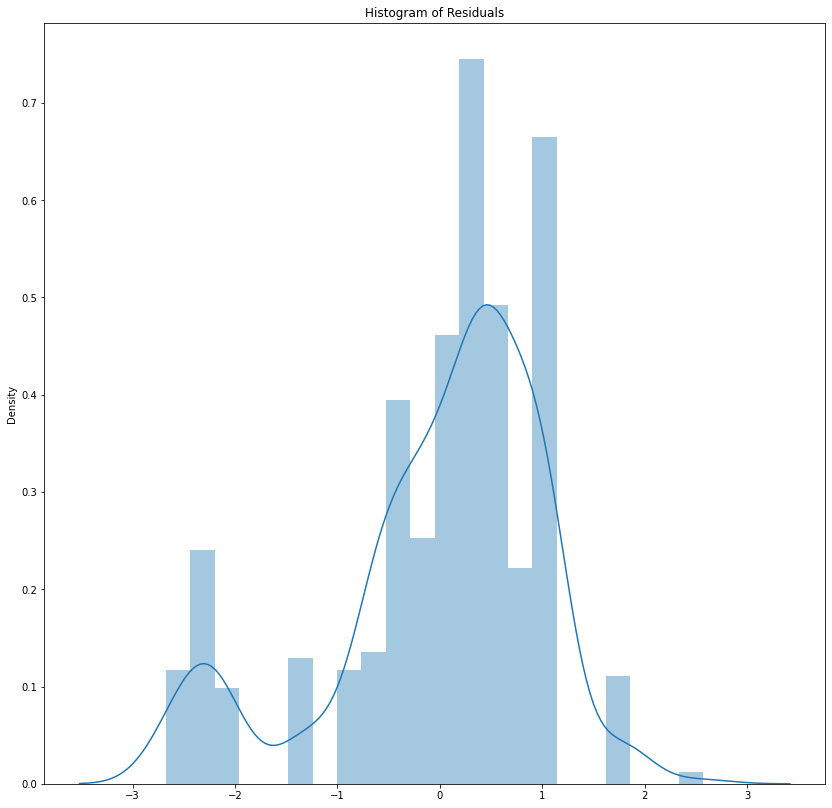

In [26]:
sns.distplot((y-y_))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")